In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [91]:
#Import Dataset
data=pd.read_csv("/kaggle/input/playground-series-s3e21/sample_submission.csv")
data=data.dropna()
data

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [4]:
# Check for missing values 
missing_values = data.isna().sum()
print("Missing Values Count:")
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("There are missing values in the DataFrame.")

Missing Values Count:
id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64
No missing values in the DataFrame.


i'm selecting the top 10 feature selected by importance.
Then I'm using an iterative method to try every possible combo(10!, it took like 30 min) selecting the best one through the RMSE metric. It select the best combo when there is no further improvement adding more variables

In [44]:
target = 'target'
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove(target)  # Remove the target variable
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_10_indices = sorted_indices[:10]
top_10_features = [num_cols[i] for i in top_10_indices]
best_features = []
best_rmse = float('inf')
#In Loop
for r in range(1, len(top_10_features) + 1):
    combinations_r = combinations(top_10_features, r)
    for combination in combinations_r:
        features_to_try = list(combination)
        X_train_subset = X_train[features_to_try]
        X_test_subset = X_test[features_to_try]

        rf.fit(X_train_subset, y_train)
        rmse = calculate_rmse(rf, X_test_subset, y_test)

        if rmse < best_rmse:
            best_rmse = rmse
            best_features = features_to_try
            
print("Final Best Features:", best_features)
print("Final Best RMSE:", best_rmse)


Final Best Features: ['O2_1', 'O2_2', 'NH4_5', 'id', 'NH4_1', 'NH4_6', 'NO2_2', 'O2_5', 'NH4_4']
Final Best RMSE: 1.123511413502964


Deleting all the variables we decided not to keep

In [111]:
col_to_keep = best_features + [target]

for i in data.columns:
    if i not in col_to_keep:
        data.loc[:, i] = 0

In [115]:
data.to_csv('submission.csv',index=False)
data

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,8.110,0,0,0.180,...,0,0,0,0,0,0,0,0,0,0
1,1,9.10,13.533,40.900,0,0,6.015,0,0,1.107,...,0,0,0,0,0,0,0,0,0,0
2,2,8.21,3.710,5.420,0,0,4.550,0,0,0.020,...,0,0,0,0,0,0,0,0,0,0
3,3,8.39,8.700,8.100,0,0,5.200,0,0,0.280,...,0,0,0,0,0,0,0,0,0,0
4,4,8.07,8.050,8.650,0,0,3.290,0,0,0.360,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,0,0,5.690,0,0,0.565,...,0,0,0,0,0,0,0,0,0,0
3496,3496,8.09,6.630,6.630,0,0,0.636,0,0,1.300,...,0,0,0,0,0,0,0,0,0,0
3497,3497,9.95,8.367,8.433,0,0,5.800,0,0,0.430,...,0,0,0,0,0,0,0,0,0,0
3498,3498,9.52,10.000,6.630,0,0,3.290,0,0,0.300,...,0,0,0,0,0,0,0,0,0,0


Plotting the feature importance to have a better understanding of our variables

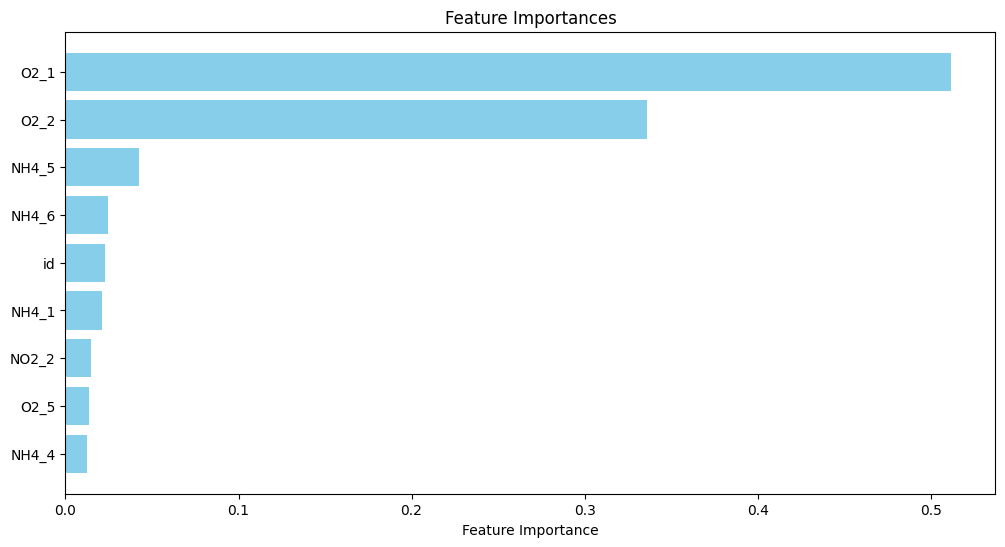

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already loaded your data into 'data' and defined 'target' and 'num_cols'

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=7, n_jobs=-1, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[num_cols], data[target], test_size=0.2, random_state=42)

# Fit the random forest model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=num_cols, columns=['Importance'])

# Filter out features with zero importance
feature_importances = feature_importances[feature_importances['Importance'] > 0]

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

I tried to use a method to deal with the Outliers: using the Z-score was the easier but removing the rows with outliers value bought an increase in the RMSE metric, so i removed it from the final results but I'll keep it here for educational purpose

In [99]:
'''
column_means = np.mean(data2, axis=0)
column_std_devs = np.std(data2, axis=0)
z_score_threshold = 3
z_scores = (data2 - column_means) / column_std_devs
outliers_count = np.sum(abs(z_scores) > z_score_threshold, axis=0)
for column, count in zip(data2.columns, outliers_count):
    print(f"Column '{column}' has {count} outliers.")
'''

Column 'O2_1' has 20 outliers.
Column 'O2_2' has 143 outliers.
Column 'NH4_5' has 1 outliers.
Column 'id' has 0 outliers.
Column 'NH4_1' has 163 outliers.
Column 'NH4_6' has 15 outliers.
Column 'NO2_2' has 76 outliers.
Column 'O2_5' has 27 outliers.
Column 'NH4_4' has 16 outliers.
Column 'target' has 69 outliers.


In [101]:
'''
column_means = np.mean(data2, axis=0)
column_std_devs = np.std(data2, axis=0)
z_score_threshold = 3
z_scores = (data2 - column_means) / column_std_devs
unique_outlier_ids = set()
for column in data2.columns:
    outlier_indices = np.where(abs(z_scores[column]) > z_score_threshold)[0]
    unique_outlier_ids.update(data['id'].iloc[outlier_indices])
unique_outlier_ids_list = list(unique_outlier_ids)
print("List of unique IDs with outliers:", unique_outlier_ids_list)
'''

List of unique IDs with outliers: [1, 2050, 3, 2057, 13, 2064, 2068, 24, 2082, 2084, 2088, 47, 2097, 49, 53, 2102, 2103, 2109, 71, 75, 2124, 2125, 87, 91, 2141, 99, 100, 101, 103, 2152, 2156, 2157, 111, 112, 2160, 121, 2170, 127, 130, 135, 138, 2188, 141, 2190, 143, 152, 2202, 156, 157, 159, 160, 161, 2214, 167, 2216, 177, 2228, 2237, 2241, 198, 2253, 2255, 207, 2256, 211, 2263, 2266, 2267, 2271, 2273, 229, 2279, 2285, 2288, 2306, 265, 2314, 279, 2329, 284, 2334, 291, 297, 2348, 301, 304, 2363, 316, 317, 2366, 326, 2374, 2376, 336, 337, 2388, 2389, 342, 343, 2392, 2396, 2397, 350, 351, 355, 2404, 2410, 2413, 369, 375, 2425, 379, 2433, 2435, 388, 2436, 2448, 402, 407, 2458, 2459, 2465, 2467, 424, 2477, 431, 2493, 451, 452, 457, 2506, 2507, 2513, 2516, 469, 474, 484, 492, 503, 504, 508, 2558, 511, 521, 2573, 526, 527, 2574, 2578, 533, 536, 2588, 541, 540, 545, 2599, 562, 563, 564, 2620, 573, 2624, 2626, 2628, 581, 2630, 2632, 2636, 2639, 2643, 596, 2654, 2659, 612, 2661, 2662, 2668, 2670

In [103]:
'''data_no_outliers = data[~data['id'].isin(unique_outlier_ids_list)]

data_no_outliers
'''

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
5,5,8.12,9.000,9.000,11.475,9.115,8.110,8.980,6.375,0.240,...,20.050,0.190,1.800,2.520,1.720,4.725,6.075,8.400,2.155,4.40
6,6,8.12,7.500,8.500,9.000,9.115,6.025,9.805,5.030,0.300,...,20.050,2.095,1.800,7.650,4.100,2.040,4.950,16.645,3.500,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3494,8.65,8.367,8.760,13.900,9.265,9.930,10.400,7.150,0.720,...,8.450,1.730,1.800,4.800,4.970,3.950,6.075,8.415,3.800,3.17
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [105]:
'''col_to_keep = best_features + [target]

for i in data_no_outliers.columns:
    if i not in col_to_keep:
        data_no_outliers.loc[:, i] = 0
        '''


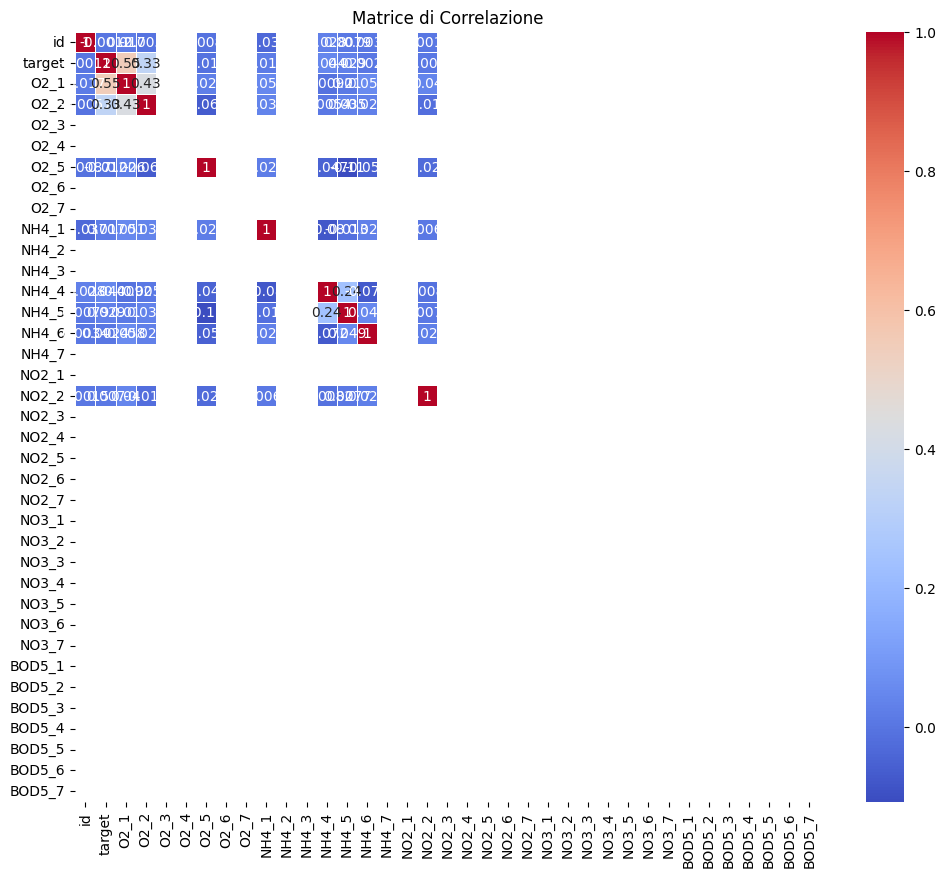

In [108]:
#Checking for eventual high correlation variables
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_no_outliers.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.show()


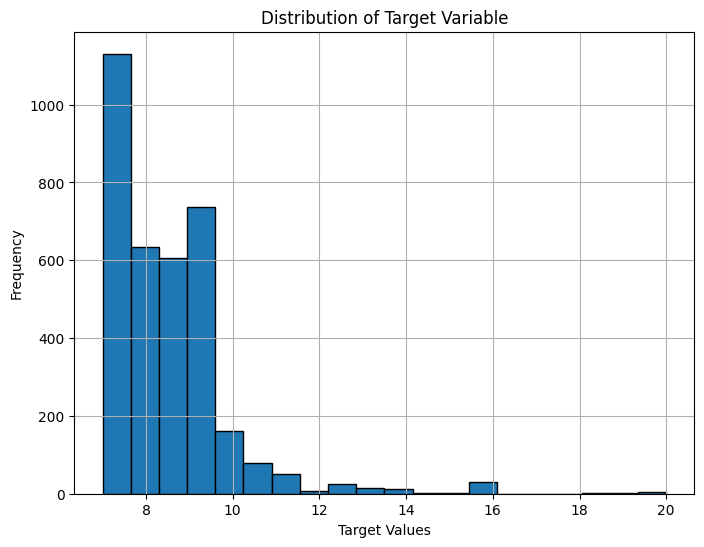

In [72]:
#plotting the target variable
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['target'], bins=20, edgecolor='k')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(True)
plt.show()
